In [19]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("chinook.db")
# total sales by country
query = """
SELECT SUM(i.total), c.country
FROM invoice i 
	JOIN customer c 
		ON c.customer_id = i.customer_id
GROUP BY c.country
ORDER BY c.country;
"""
df = pd.read_sql_query(query, conn)

df.head()


,SUM(i.total),country
0,39.60,Argentina
1,81.18,Australia
2,69.30,Austria
3,60.39,Belgium
4,427.68,Brazil


In [20]:
df.columns

Index(['SUM(i.total)', 'country'], dtype='object')

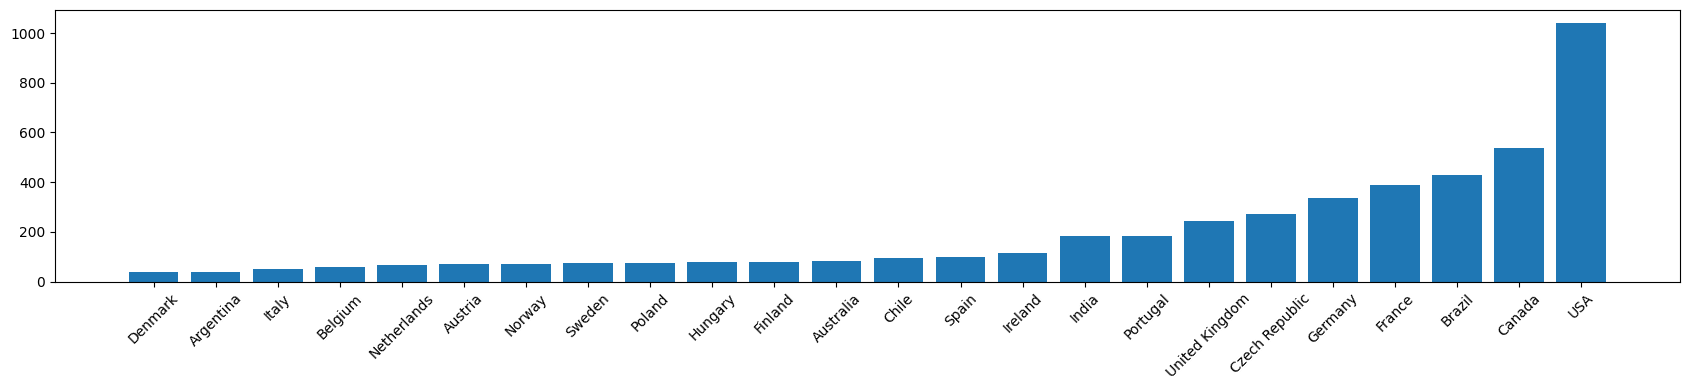

In [21]:
# Total Sales by Country
df_sorted = df.sort_values('SUM(i.total)')
plt.figure(figsize=(17, 4))
plt.bar(df_sorted['country'], df_sorted['SUM(i.total)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [40]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("chinook.db")

query = """
SELECT 
    (e.first_name || ' ' || e.last_name) AS employee_full_name,
    COUNT(c.customer_id) AS customers
FROM employee e
JOIN customer c
    ON c.support_rep_id = e.employee_id
GROUP BY employee_full_name
ORDER BY customers;
"""
df = pd.read_sql_query(query, conn)
print(df.head())

  employee_full_name  customers
0      Steve Johnson         18
1      Margaret Park         20
2       Jane Peacock         21


In [41]:
print(df.columns)


Index(['employee_full_name', 'customers'], dtype='object')


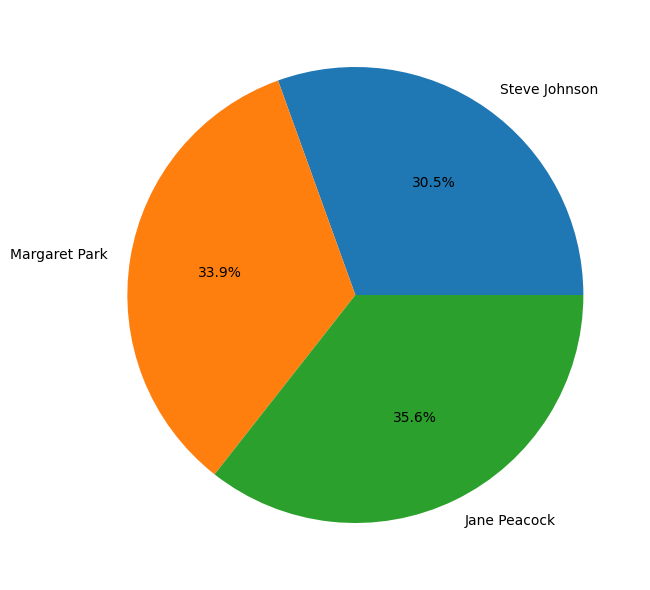

In [37]:
plt.figure(figsize=(12, 6))
plt.pie(df['customers'], labels=df['employee_full_name'], autopct='%1.1f%%')
plt.tight_layout()
plt.show()

In [ ]:
We can see here chinooks 3 support reps have equal customers.

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("chinook.db")

query = """
SELECT milliseconds/60000 AS minutes, unit_price
FROM track;
"""
df = pd.read_sql_query(query, conn)
print(df.head())

   minutes  unit_price
0        5        0.99
1        5        0.99
2        3        0.99
3        4        0.99
4        6        0.99


In [3]:
df.columns

Index(['minutes', 'unit_price'], dtype='object')

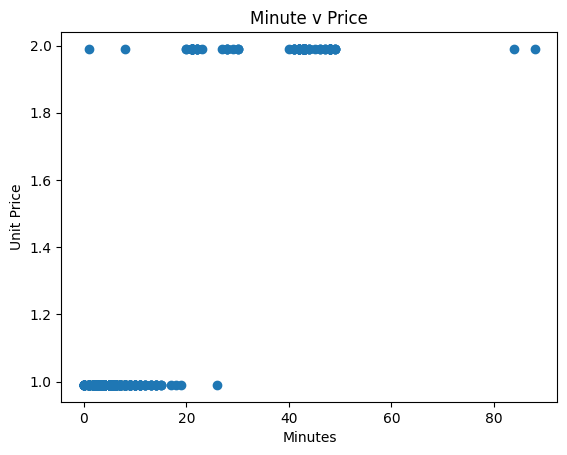

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = df['minutes']
y = df['unit_price']

plt.scatter(x, y)

plt.xlabel("Minutes")
plt.ylabel("Unit Price")
plt.title("Minute v Price")

plt.show()

In [ ]:
There is no correlation between longer songs and higher price point.

In [11]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("chinook.db")

query = """
SELECT 
    c.country,
    g.name AS genre,
    SUM(il.unit_price * il.quantity) AS total_sales
FROM customer c
JOIN invoice i           ON i.customer_id = c.customer_id
JOIN invoice_line il     ON il.invoice_id = i.invoice_id
JOIN track t             ON t.track_id = il.track_id
JOIN genre g             ON g.genre_id = t.genre_id
GROUP BY 
    c.country,
    g.name;
"""
df = pd.read_sql_query(query, conn)
print(df.head())

     country               genre  total_sales
0  Argentina         Alternative         0.99
1  Argentina  Alternative & Punk        16.83
2  Argentina               Blues         1.98
3  Argentina      Easy Listening         0.99
4  Argentina         Heavy Metal         0.99


In [12]:
df.columns

Index(['country', 'genre', 'total_sales'], dtype='object')

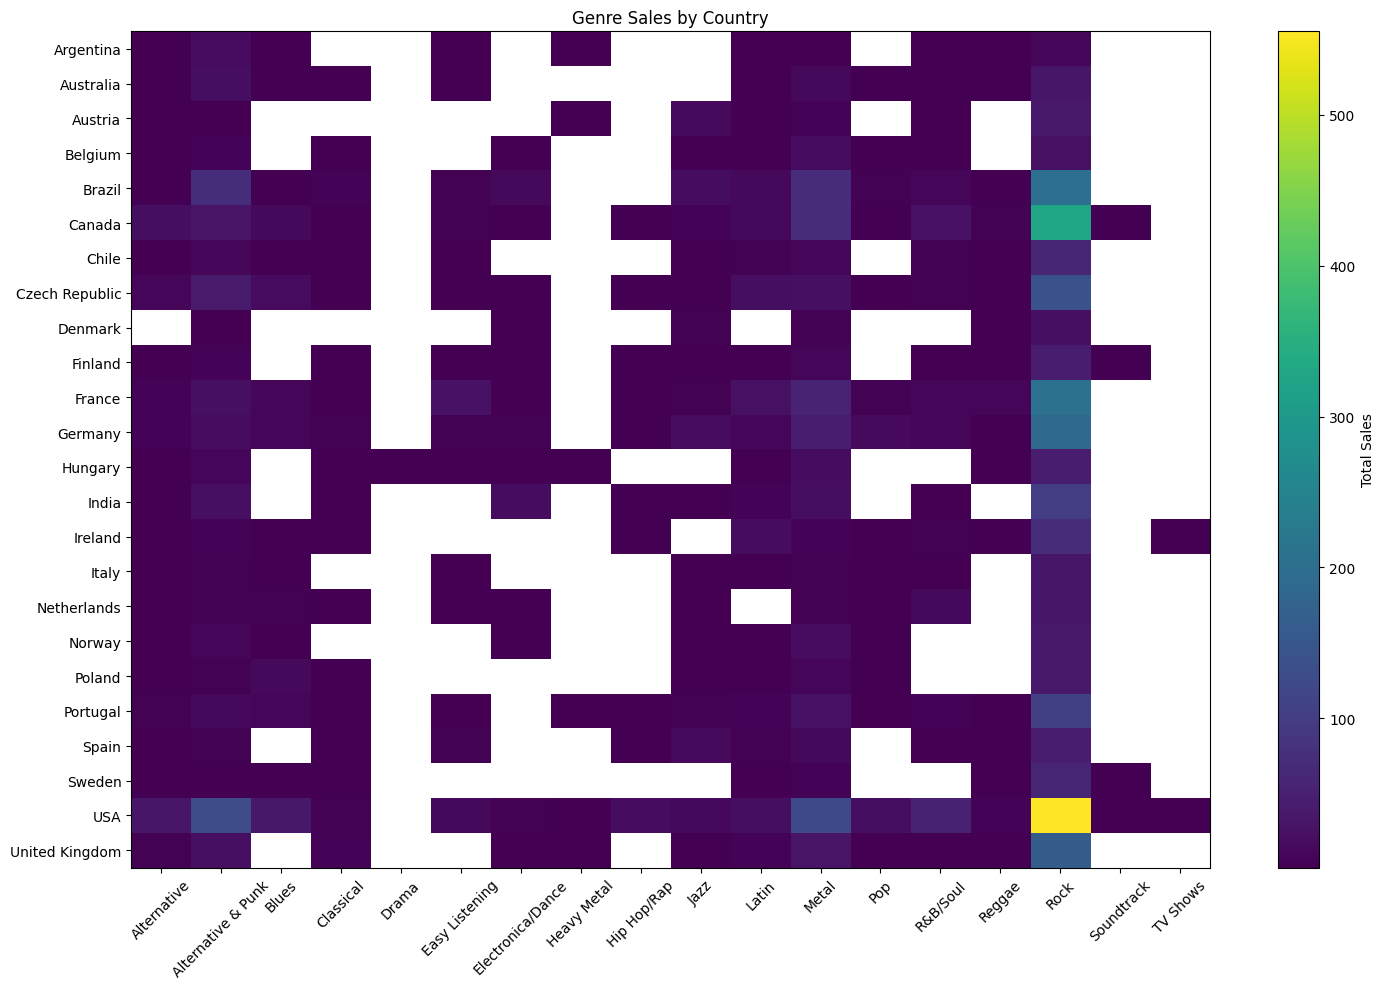

In [18]:
pivot = df.pivot(index='country', columns='genre', values='total_sales')

plt.figure(figsize=(15, 10))
plt.imshow(pivot, aspect='auto')
plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=45)
plt.yticks(range(len(pivot.index)), pivot.index)
plt.colorbar(label='Total Sales')
plt.title("Genre Sales by Country")
plt.tight_layout()
plt.show()


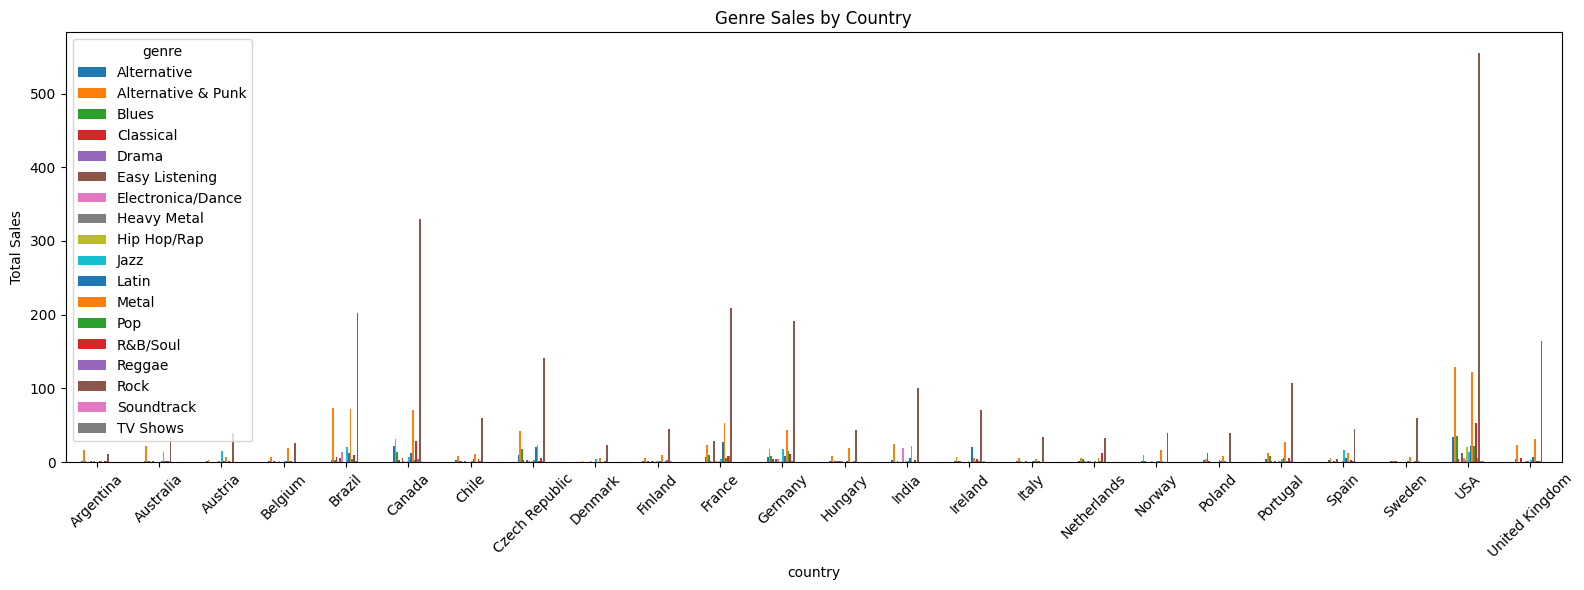

In [17]:
pivot = df.pivot(index='country', columns='genre', values='total_sales').fillna(0)

pivot.plot(kind='bar', figsize=(16, 6))
plt.ylabel("Total Sales")
plt.title("Genre Sales by Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
Seems rock is the most popular across the board.